# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# Eksperimen — Weather Prediction (Time Series)
Dataset: weather (Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), Daily Summary)
Tujuan: preprocessing dan menghasilkan dataset harian siap-latihan (weather_preprocessed.csv)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from pandas.api.types import is_numeric_dtype

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
DATA_PATH = "weatherHistory.csv"
df = pd.read_csv(DATA_PATH)

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Formatted Date,96453,96429,2010-08-02 01:00:00.000 +0200,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summary,96453,27,Partly Cloudy,31733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precip Type,95936,2,rain,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (C),96453.0,NaN,NaN,NaN,11.932678,9.551546,-21.822222,4.688889,12.0,18.838889,39.905556
Apparent Temperature (C),96453.0,NaN,NaN,NaN,10.855029,10.696847,-27.716667,2.311111,12.0,18.838889,39.344444
Humidity,96453.0,NaN,NaN,NaN,0.734899,0.195473,0.0,0.6,0.78,0.89,1.0
Wind Speed (km/h),96453.0,NaN,NaN,NaN,10.81064,6.913571,0.0,5.8282,9.9659,14.1358,63.8526
Wind Bearing (degrees),96453.0,NaN,NaN,NaN,187.509232,107.383428,0.0,116.0,180.0,290.0,359.0
Visibility (km),96453.0,NaN,NaN,NaN,10.347325,4.192123,0.0,8.3398,10.0464,14.812,16.1
Loud Cover,96453.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# convert datetime and sort
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')
df = df.sort_values('Formatted Date').reset_index(drop=True)
print("Range:", df['Formatted Date'].min(), "to", df['Formatted Date'].max())

# Missing values
missing = df.isna().sum()
print("Missing per column:\n", missing)

# Unique categories
print("Precip Type unique:", df['Precip Type'].unique()[:10])
print("Summary sample:", df['Summary'].value_counts().head())

/tmp/ipython-input-3978165648.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


Range: 2006-01-01 00:00:00+01:00 to 2016-12-31 23:00:00+01:00
Missing per column:
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Precip Type unique: ['rain' 'snow' nan]
Summary sample: Summary
Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
Name: count, dtype: int64


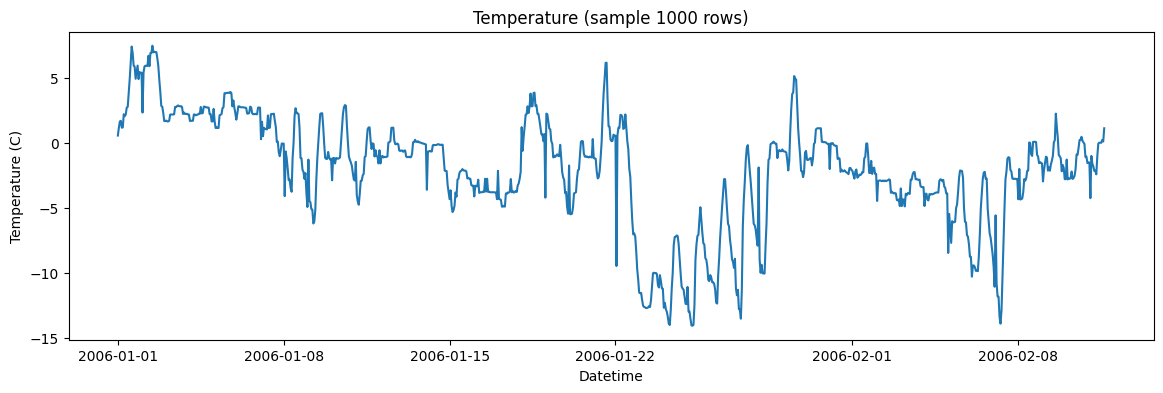

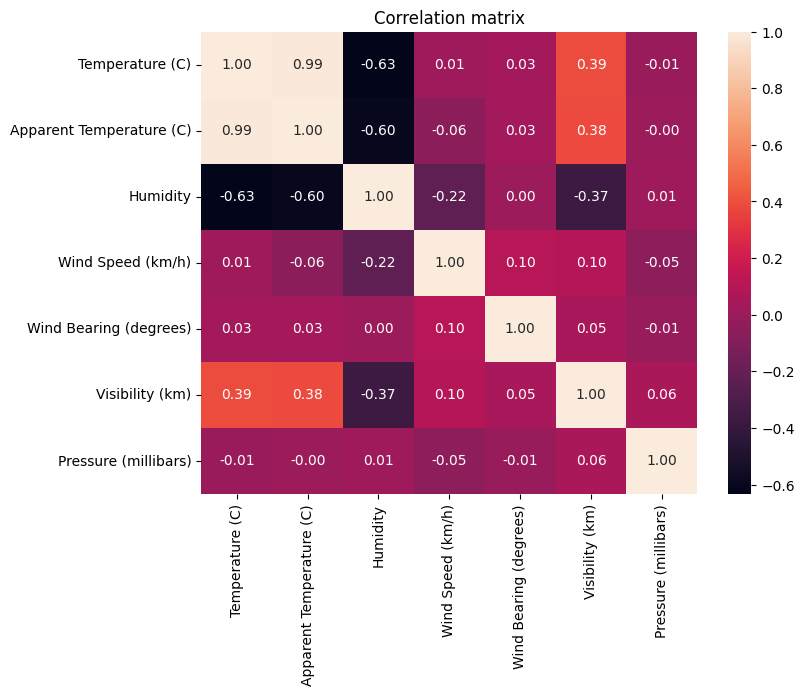

In [7]:
# Visualisasi temperature (contoh hourly)
plt.figure(figsize=(14,4))
plt.plot(df['Formatted Date'].iloc[:1000], df['Temperature (C)'].iloc[:1000])
plt.title("Temperature (sample 1000 rows)")
plt.xlabel("Datetime")
plt.ylabel("Temperature (C)")
plt.show()

# Correlation heatmap (numerical cols)
num_cols = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()

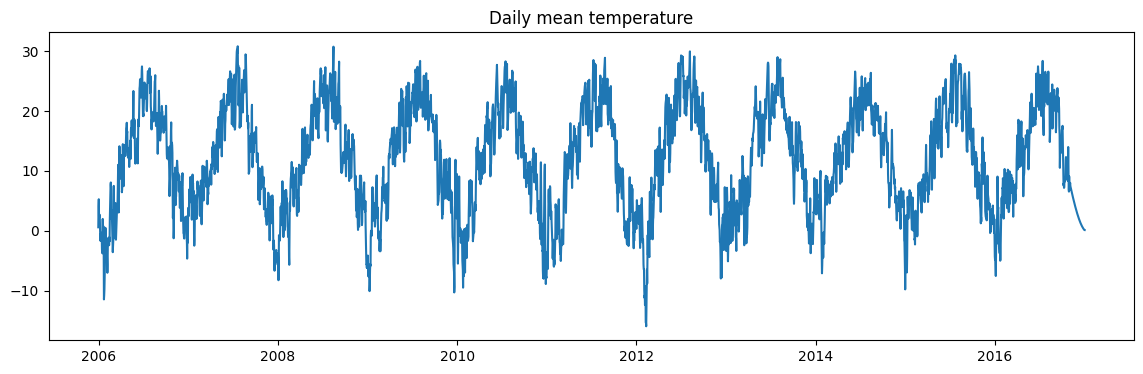

In [11]:
# daily mean quick
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')
df['Date'] = df['Formatted Date'].dt.date
daily_sample = df.groupby('Date')['Temperature (C)'].mean().reset_index()
plt.figure(figsize=(14,4))
plt.plot(pd.to_datetime(daily_sample['Date']), daily_sample['Temperature (C)'])
plt.title("Daily mean temperature")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Preprocessing steps
def preprocess_to_daily(df_in):
    df = df_in.copy()
    # drop not informative columns
    drop_cols = [c for c in ['Loud Cover','Daily Summary'] if c in df.columns]
    df = df.drop(columns=drop_cols)
    # ensure datetime
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')
    df = df.dropna(subset=['Formatted Date'])
    df = df.sort_values('Formatted Date')
    # Create date column
    df['Date'] = df['Formatted Date'].dt.date
    # Aggregate to daily mean for numerical cols
    agg_dict = {}
    num_cols = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
    for c in num_cols:
        if c in df.columns:
            agg_dict[c] = 'mean'
    daily = df.groupby('Date').agg(agg_dict).reset_index()
    # Optionally include mode of Precip Type and Summary (top value)
    if 'Precip Type' in df.columns:
        precip = df.groupby('Date')['Precip Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
        daily = daily.merge(precip, on='Date', how='left')
    if 'Summary' in df.columns:
        summary = df.groupby('Date')['Summary'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
        daily = daily.merge(summary, on='Date', how='left')
    # handle missing (simple imputation)
    daily = daily.fillna(method='ffill').fillna(method='bfill')
    return daily

daily = preprocess_to_daily(df)
daily.head()

/tmp/ipython-input-2640859415.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily = daily.fillna(method='ffill').fillna(method='bfill')


,Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type,Summary
0,2005-12-31,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000,rain,Partly Cloudy
1,2006-01-01,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,1011.985000,rain,Mostly Cloudy
2,2006-01-02,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,1010.384167,rain,Overcast
3,2006-01-03,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,1021.170833,rain,Overcast
4,2006-01-04,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,981.770833,rain,Overcast


In [13]:
# Create lag features and rolling stats (7-day)
daily = daily.copy()
daily['Date'] = pd.to_datetime(daily['Date'])
daily = daily.sort_values('Date').reset_index(drop=True)
target = 'Temperature (C)'

# create lags 1 7
for lag in range(1,8):
    daily[f'{target}_lag_{lag}'] = daily[target].shift(lag)

# rolling mean/std last 7 days
daily['temp_roll7_mean'] = daily[target].rolling(window=7).mean()
daily['temp_roll7_std'] = daily[target].rolling(window=7).std()

# drop initial rows with NaN due to lags
daily = daily.dropna().reset_index(drop=True)
daily.head()

,Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type,Summary,Temperature (C)_lag_1,Temperature (C)_lag_2,Temperature (C)_lag_3,Temperature (C)_lag_4,Temperature (C)_lag_5,Temperature (C)_lag_6,Temperature (C)_lag_7,temp_roll7_mean,temp_roll7_std
0,2006-01-07,0.877083,-0.749769,0.935833,6.589596,102.041667,4.585817,1030.223750,rain,Foggy,2.550463,2.703935,2.251852,2.340509,5.263194,4.075000,0.577778,2.866005,1.410860
1,2006-01-08,-1.231713,-2.805093,0.868750,5.397525,113.916667,8.694671,1035.481250,snow,Clear,0.877083,2.550463,2.703935,2.251852,2.340509,5.263194,4.075000,2.107903,1.968492
2,2006-01-09,-1.693287,-2.840046,0.792500,5.113762,221.250000,8.891225,1034.542500,snow,Partly Cloudy,-1.231713,0.877083,2.550463,2.703935,2.251852,2.340509,5.263194,1.114120,1.863228
3,2006-01-10,-0.532639,-0.760648,0.814583,3.779475,296.875000,7.562304,946.804583,snow,Mostly Cloudy,-1.693287,-1.231713,0.877083,2.550463,2.703935,2.251852,2.340509,0.703671,1.864502
4,2006-01-11,-1.392361,-2.270602,0.898750,5.115775,194.583333,3.745933,1032.370833,snow,Mostly Cloudy,-0.532639,-1.693287,-1.231713,0.877083,2.550463,2.703935,2.251852,0.183069,1.868935


In [14]:
# Save processed dataset
os.makedirs("preprocessing_output", exist_ok=True)
out_path = "preprocessing_output/weather_preprocessed.csv"
daily.to_csv(out_path, index=False)
print("Saved processed data to", out_path)

Saved processed data to preprocessing_output/weather_preprocessed.csv


In [15]:
# Final checks
print("Shape:", daily.shape)
daily.describe().T

Shape: (4012, 19)


,count,mean,min,25%,50%,75%,max,std
Date,4012,2011-07-05 11:59:59.999999744,2006-01-07 00:00:00,2008-10-05 18:00:00,2011-07-05 12:00:00,2014-04-03 06:00:00,2016-12-31 00:00:00,NaN
Temperature (C),4012.0,11.942996,-15.958796,5.056481,12.212963,19.196296,30.814352,8.787188
Apparent Temperature (C),4012.0,10.867447,-18.825463,2.798727,11.869676,19.192477,30.034028,9.93738
Humidity,4012.0,0.734663,0.2975,0.631979,0.74375,0.8425,0.995,0.134922
Wind Speed (km/h),4012.0,10.809977,1.1109,7.22672,9.924979,13.354615,37.929588,5.000094
Wind Bearing (degrees),4012.0,187.53014,7.708333,141.28125,183.625,237.59375,336.416667,67.268213
Visibility (km),4012.0,10.351309,0.0,8.887032,11.318635,12.077013,15.924912,3.212006
Pressure (millibars),4012.0,1003.241907,336.5425,1010.820729,1015.989792,1020.553333,1043.532083,71.284345
Temperature (C)_lag_1,4012.0,11.943603,-15.958796,5.056481,12.212963,19.196296,30.814352,8.786454
Temperature (C)_lag_2,4012.0,11.944248,-15.958796,5.056481,12.212963,19.196296,30.814352,8.785681
